# 시계열 데이터

##### 시간정보가 들어간 데이터
##### 순서가 중요
##### 셈플의 길이가 다름

# 시계열 데이터를 인식하는 모델(구형)
##### ARIMA(autoregressive integrated moving average)
##### SARIMA(seasonal ARIMA)
##### Prophet   
##### and so on.....

# 순환신경망... recurrent neural network  RNN
# LSTM(long short-term memory)  - 장기문맥 처리에 유리

#### 지금까지 우리가 배운 딥러닝 또는 신경망들은.. 정적인 데이터를 한꺼번에 처리
# 시계열 데이터를 다루기위해서는 순환신경망이나 LSTM이 유리

In [1]:
# 시계열 데이터의 특징
# 순서가중요
# 셈플의 길이가 다름
# 문맥 의존성  ~~ 특성이 있다....
# 계절성 : 미세먼지 수치, 항공권 판매량, 감기환자의 발생수, 야채 판매량

#  시계열 데이터 수학적으로 표현 X = (a1 a2 a3 ....)
# 가변길이고 벡터

In [2]:
# 순환신경망을 이용한 시계열 데이터 처리
# 내일 주가 예측, 날씨, 기계고장, 농산물 가격/수요량
# 언어 번역
# 음성 인식
# 사진을 보고 문장 생성  -- 인공지능 기사

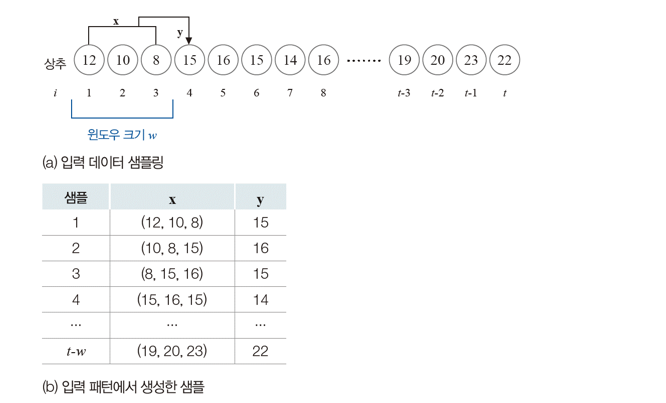

In [3]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/62.PNG", width=500)
# 5년동안 매일 판매량을기록 t = 365*5 = 1825개의 셈플
# 윈도우 크기단위(w)로 패턴을 잘라서 여러개의 샘플을 수집  아래에서는 w=3
# 수평선 계수 h    여기서는 h=1   얼마나 먼 미래르 예측할지 나타내는 수치
# 단일체널일 경우

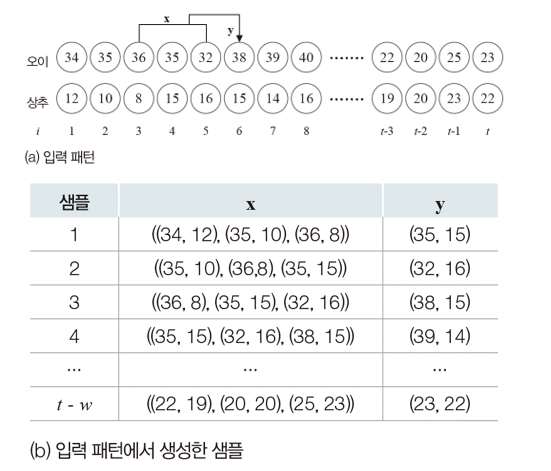

In [4]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/63.PNG", width=500)
# 다중채널

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [6]:
df= pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/data/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv")
print(df.head())

  Currency        Date  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
0      BTC  2019-02-28          3772.936335     3796.637284     3824.165879   
1      BTC  2019-03-01          3799.678543     3773.441461     3879.231185   
2      BTC  2019-03-02          3811.611979     3799.367026     3840.044823   
3      BTC  2019-03-03          3804.419170     3806.691513     3819.194356   
4      BTC  2019-03-04          3782.664101     3807.845756     3818.695481   

   24h Low (USD)  
0    3666.524016  
1    3753.800022  
2    3788.918498  
3    3759.409216  
4    3766.242048  


In [7]:
# 시계열데이터 시각화 하기
# --> 시계열은 시간순서가 중요하기때문에 시각화 하려는 데이터가 오름차순인지 확인 또는 정렬한다.
df = df.sort_values(by=['Date'])
seq =  df[df.columns[2]].to_numpy()
print(f"데이터의 길이 : {len(seq)}  head = {seq[:6]}")

데이터의 길이 : 365  head = [3772.93633533 3799.67854295 3811.61197937 3804.41917011 3782.66410112
 3689.86289319]


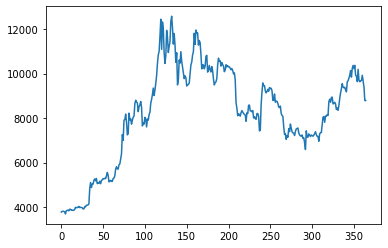

In [8]:
plt.plot(seq)
plt.show()

In [11]:
 h = 1; window=3
def seqDataSet(seq,window,h):
    x=[];y=[]
    for i in range(len(seq)):
        if i+window+h < len(seq): 
            x.append(seq[i:i+window])
            y.append(seq[i+window+h])
    return x,y        
x,y = seqDataSet(seq, 3,1)
len(x), len(y)

(361, 361)

In [12]:
# 제대로 데이터를 추출했는지 검증..
# y의 마지막 값은 기존 seq의 마지막이 되어야 한다
y[0],seq[window+h],y[-1],seq[-1]

(3782.6641011218, 3782.6641011218, 8784.9953524383, 8784.9953524383)

In [13]:
np.asarray(x).shape, np.asarray(y).shape

((361, 3), (361,))

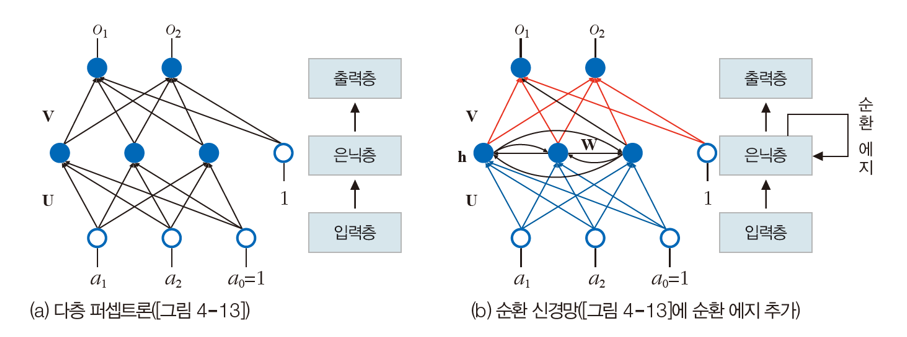

In [14]:
# 시계열 데이터를 처리하는 신경망
# 시간에 따라서 값이 하나씩 순차적으로 들어오는 신경망을 설계
# 다층 퍼셉트론을 이용
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/64.PNG", width=500)

In [15]:
# 가중치들의 집합
# 다층 퍼셉트론 {U,V}
# 다층 퍼셉트론 {U,V,W}

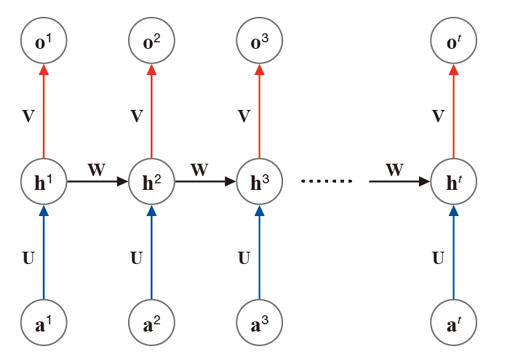

In [16]:
# 순환신경망 데이터 입력되는 모양
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/65.PNG", width=300)

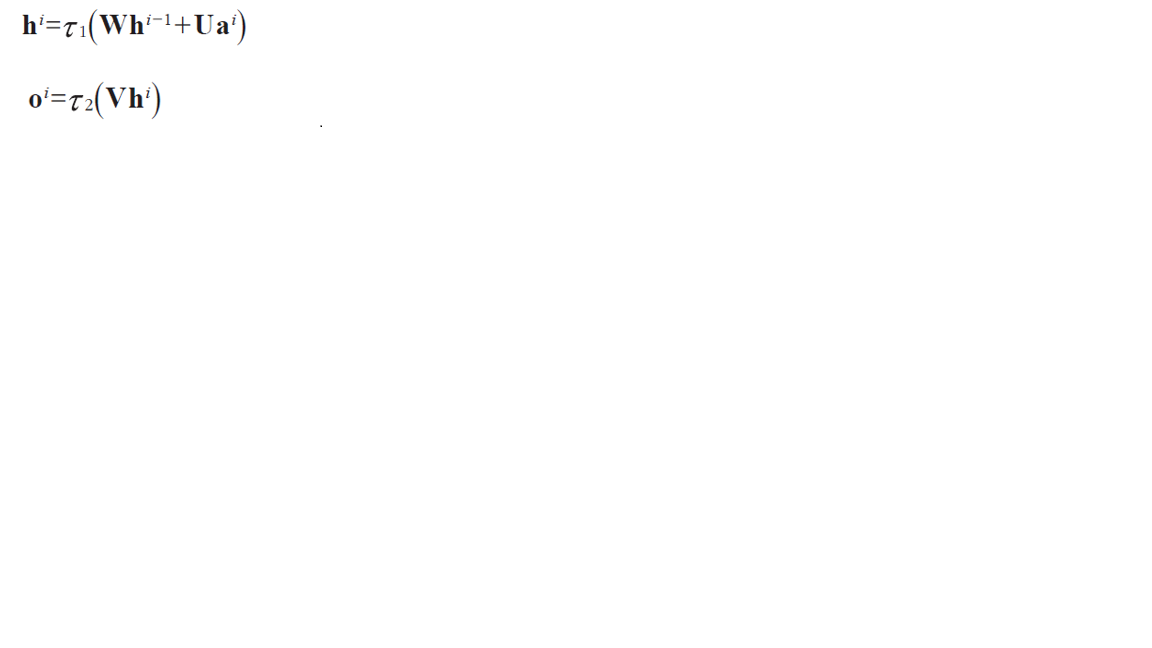

In [17]:
# 순환 신경망 동작
# ai은 가중치 U를 통해 은닉층의 상태 hi에 영향을 미치고 , hi는 가중치 V를 통해 출력 oi에 영향을 미치
# hi-1 는 가중치 W를 통해 hi에 영향을 미치
# 첫번째 : 은닉층에서 일어나는 계산
# 두번째 : 출력층에서 일어나는 계산
# 첫번째 계산식에서 Whi-1을 제외하면 다층 퍼셉트론과 동일
# 순환신경망은 이전순간의 은닉층 상태 hi-1을 현재 순간의 은닉층 상태 hi로 전달하여 시간흐름의 정보를 처리
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/66.PNG", width=500)

In [18]:
# 순환신경망에 사용하는 알고리즘을 BPTT 알고리즘
# 순한신경망의 한계
# - 은닉층의 상태를 다음 순간으로 넘기는 기능을 통해 과저 정보를 전달
# - 장기문맥 은.. 멀리떨어진 상태를 제대로 반영 못하는 단점. .그런데 .만약.. 그 멀리떨어진 정보가 현재 상태
#에 밀접한 영향을 준다면????
# 인간에 비유하면.. 기억력감퇴
# 추억.... 중요한 순간은 기억한다. -- 선별 기억력을 갖췄다... -->LSTM

In [19]:
# 단일 채널  --> 종가
# 다중 채널  --> 종가 시가 고가 저가를 모두 고려
df.head()


,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-02-28,3772.936335,3796.637284,3824.165879,3666.524016
1,BTC,2019-03-01,3799.678543,3773.441461,3879.231185,3753.800022
2,BTC,2019-03-02,3811.611979,3799.367026,3840.044823,3788.918498
3,BTC,2019-03-03,3804.419170,3806.691513,3819.194356,3759.409216
4,BTC,2019-03-04,3782.664101,3807.845756,3818.695481,3766.242048


In [20]:
# 단일셈플 로 가격예측하는 프로그램
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout

In [29]:
coindesk_data = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/data/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv")
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함

numpy.ndarray

In [35]:
# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y=seq2dataset(seq,w,h)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

In [36]:
# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 1s - loss: 1157.1888 - mae: 1157.1888 - val_loss: 339.4106 - val_mae: 339.4106 - 1s/epoch - 4ms/step
Epoch 2/200
250/250 - 0s - loss: 598.3934 - mae: 598.3934 - val_loss: 514.9106 - val_mae: 514.9106 - 415ms/epoch - 2ms/step
Epoch 3/200
250/250 - 0s - loss: 570.4698 - mae: 570.4698 - val_loss: 346.0507 - val_mae: 346.0507 - 398ms/epoch - 2ms/step
Epoch 4/200
250/250 - 0s - loss: 572.3715 - mae: 572.3715 - val_loss: 317.2954 - val_mae: 317.2954 - 428ms/epoch - 2ms/step
Epoch 5/200
250/250 - 0s - loss: 645.8555 - mae: 645.8555 - val_loss: 591.1694 - val_mae: 591.1694 - 392ms/epoch - 2ms/step
Epoch 6/200
250/250 - 0s - loss: 557.4230 - mae: 557.4230 - val_loss: 395.5278 - val_mae: 395.5278 - 433ms/epoch - 2ms/step
Epoch 7/200
250/250 - 0s - loss: 497.1718 - mae: 497.1718 - val_loss: 306.7122 - val_mae: 306.7122 - 412ms/epoch - 2ms/step
Epoch 8/200
250/250 - 0s - loss: 498.5632 - mae: 498.5632 - val_loss: 305.7899 - val_mae: 305.7899 - 463ms/epoch - 2ms/step
Epoch 9/2